# print feature importance for each iteration

In [24]:
import xgboost as xgb
import pprint

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter()

def fmap(trees):
    fmap = {}
    for tree in trees:
        for line in tree.split('\n'):
            # look for the opening square bracket
            arr = line.split('[')
            # if no opening bracket (leaf node), ignore this line
            if len(arr) == 1:
                continue

            # extract feature name from string between []
            fid = arr[1].split(']')[0].split('<')[0]

            if fid not in fmap:
                # if the feature hasn't been seen yet
                fmap[fid] = 1
            else:
                fmap[fid] += 1
    return fmap

def MyCallback():
    def callback(env):
        pass
        trees = env.model.get_dump(with_stats=True)
        feature_weight = fmap(trees)
        pp.pprint(trees)
        print(feature_weight)
        print(env.model.get_score(importance_type='gain'))
    return callback

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {'objective':'reg:squarederror', 'eval_metric': 'rmse'}


# f_target_weight

In [25]:
v1=0.5
v2=0.3
v3=0.2

f_target_weight = [v1/2,v1/2,
                   v2/3,v2/3,v2/3,
                   v3/5,v3/5,v3/5,v3/5,v3/5,
                   ]
sum(f_target_weight)

1.0

In [26]:
bst = xgb.train(params, dtrain, num_boost_round=2, evals=[(dtrain, 'train'), (dtest, 'test')],
        callbacks=[MyCallback()])



update_method: 0


['0:[f12<9.72500038] yes=1,no=2,missing=1,gain=13821.3594,cover=404\n'
 '\t1:[f5<6.94099998] yes=3,no=4,missing=3,gain=4945.9375,cover=173\n'
 '\t\t3:[f7<1.48494995] yes=7,no=8,missing=7,gain=54.140625,cover=117\n'
 '\t\t\t7:leaf=11.1375008,cover=3\n'
 '\t\t\t8:[f5<6.54300022] yes=15,no=16,missing=15,gain=13.8671875,cover=114\n'
 '\t\t\t\t15:leaf=6.63821936,cover=72\n'
 '\t\t\t\t16:leaf=8.03651237,cover=42\n'
 '\t\t4:[f5<7.43700027] yes=9,no=10,missing=9,gain=20.40625,cover=56\n'
 '\t\t\t9:leaf=9.67676544,cover=33\n'
 '\t\t\t10:[f0<2.65402508] yes=17,no=18,missing=17,gain=218.140625,cover=23\n'
 '\t\t\t\t17:leaf=12.9000006,cover=22\n'
 '\t\t\t\t18:leaf=3.21000004,cover=1\n'
 '\t2:[f12<16.0849991] yes=5,no=6,missing=5,gain=2029.88281,cover=231\n'
 '\t\t5:[f11<47.7250023] yes=11,no=12,missing=11,gain=58.078125,cover=117\n'
 '\t\t\t11:leaf=1.45500004,cover=1\n'
 '\t\t\t12:leaf=5.9989748,cover=116\n'
 '\t\t6:[f0<10.4524002] yes=13,no=14,missing=13,gain=497.976562,cover

<AxesSubplot:>

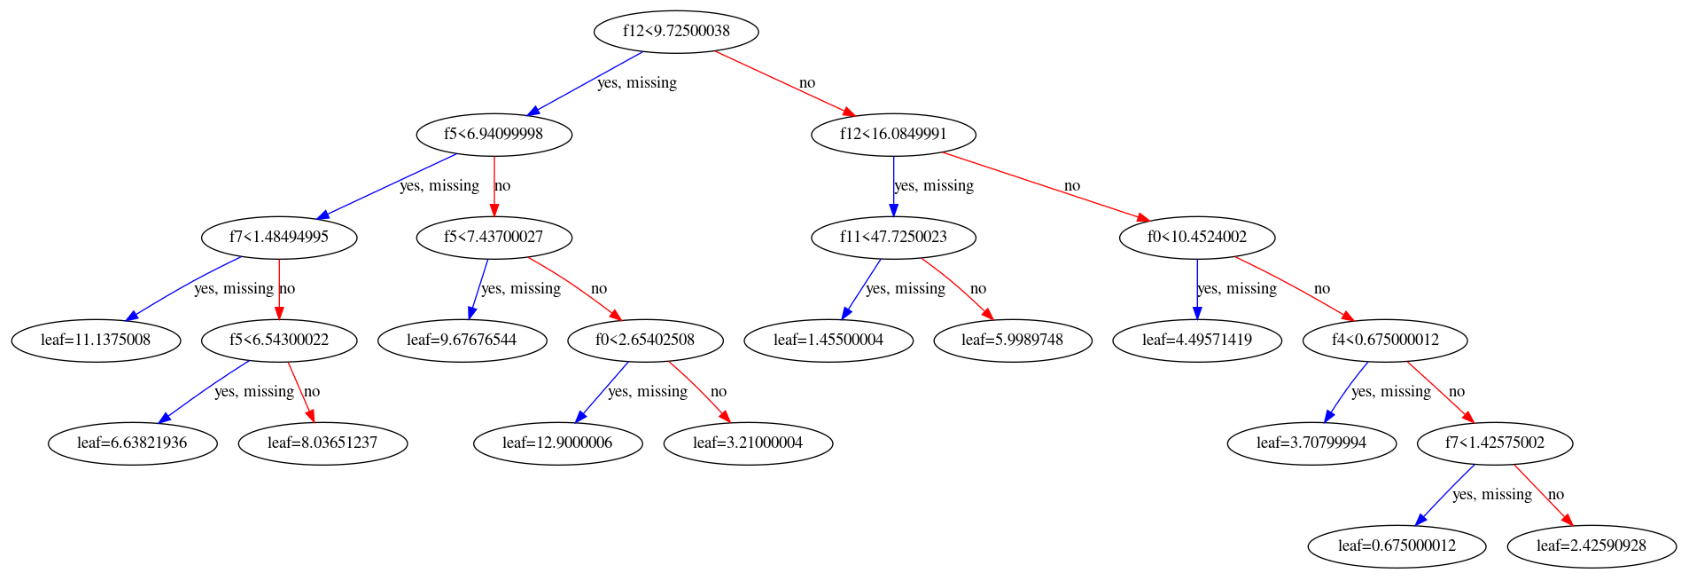

In [20]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(bst,ax=ax)

In [15]:
xgb.feature_importances_

AttributeError: module 'xgboost' has no attribute 'feature_importances_'